In [1]:
from src.chinese_checkers.game.ChineseCheckersGame import ChineseCheckersGame
from src.chinese_checkers.geometry.Printer import Printer
from src.chinese_checkers.simulation.GameSimulation import GameSimulation
from src.chinese_checkers.model.BootstrapModel import BootstrapModel
from src.chinese_checkers.simulation.GameSimulationCatalog import GameSimulationCatalog

---

### Sample target positions

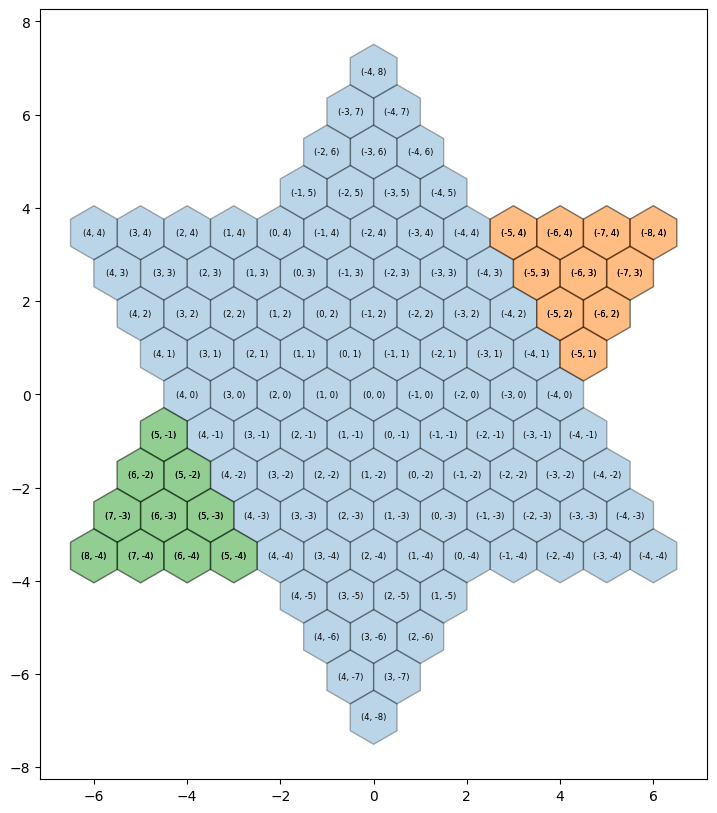

In [5]:
# set up the game
printer = Printer(plot_size=10, show_coordinates=True)
game = ChineseCheckersGame.start_game(3)

printer.print(
    game.board.hexagram_points,
    game.players[1].positions,
    game.players[1].target_positions
)

---
### Simulate a game between two centroid models

Game Winner: Player([(-3, -4), (-2, -3), (-4, -2), (-2, -4), (-3, -2), (-4, -1), (-4, -3), (-4, -4), (-1, -4), (-3, -3)], [(-1, -4), (-2, -3), (-2, -4), (-3, -2), (-3, -3), (-3, -4), (-4, -1), (-4, -2), (-4, -3), (-4, -4)], 0)


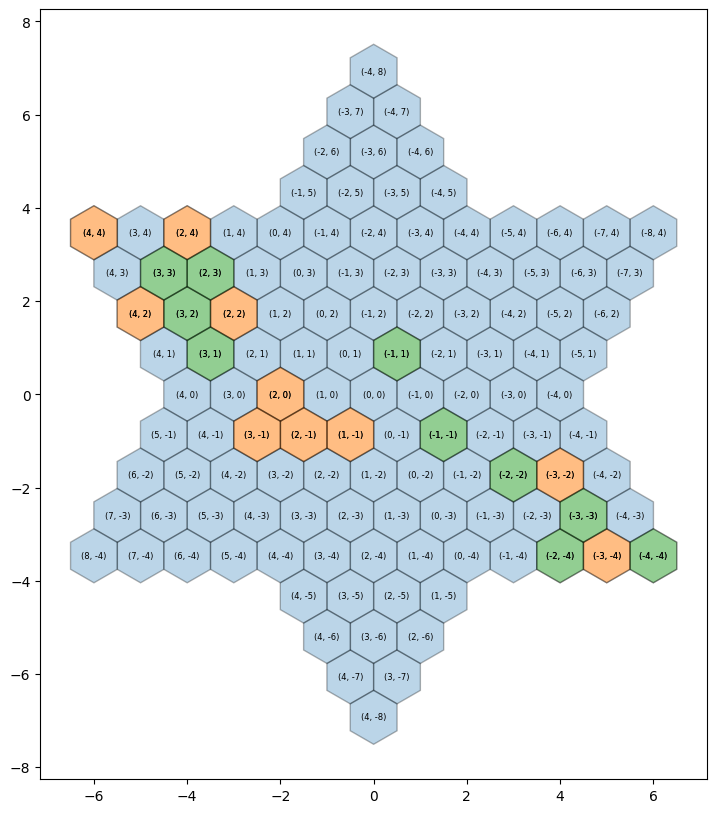

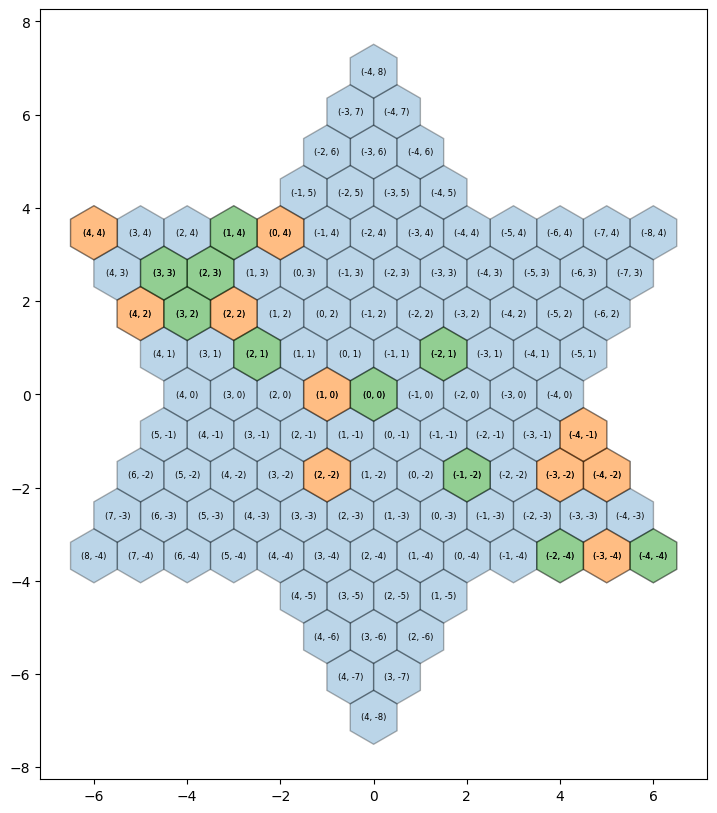

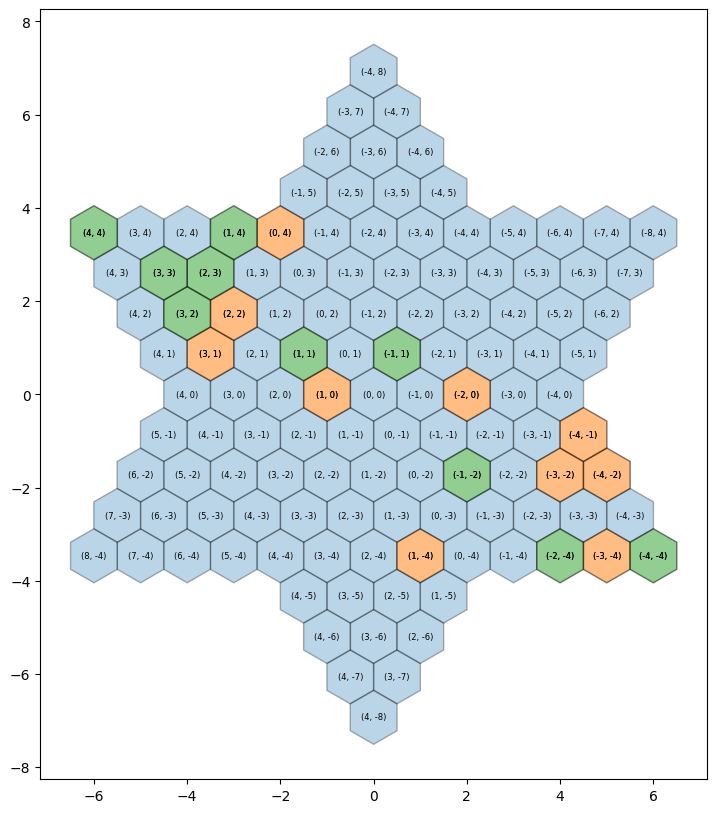

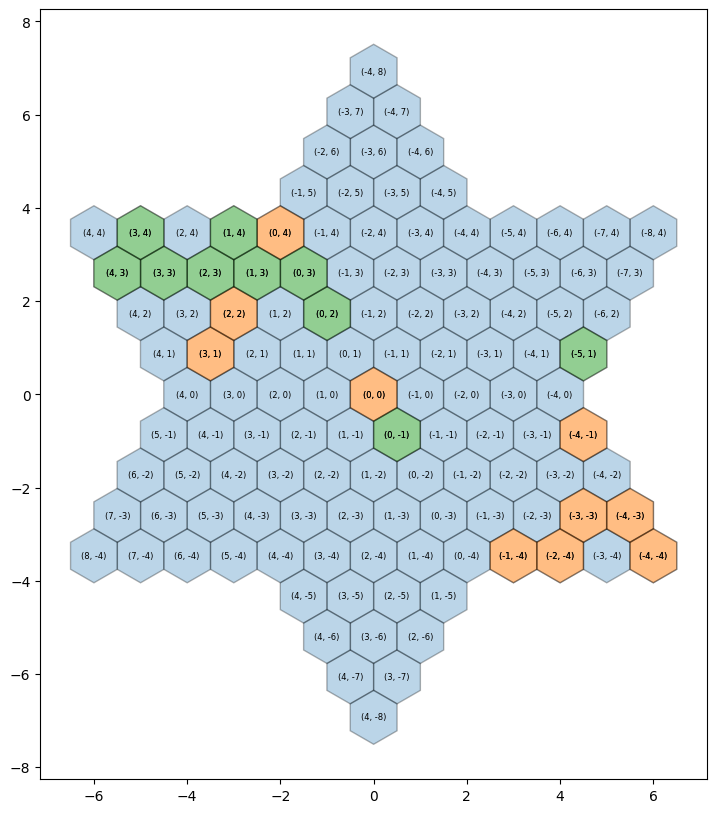

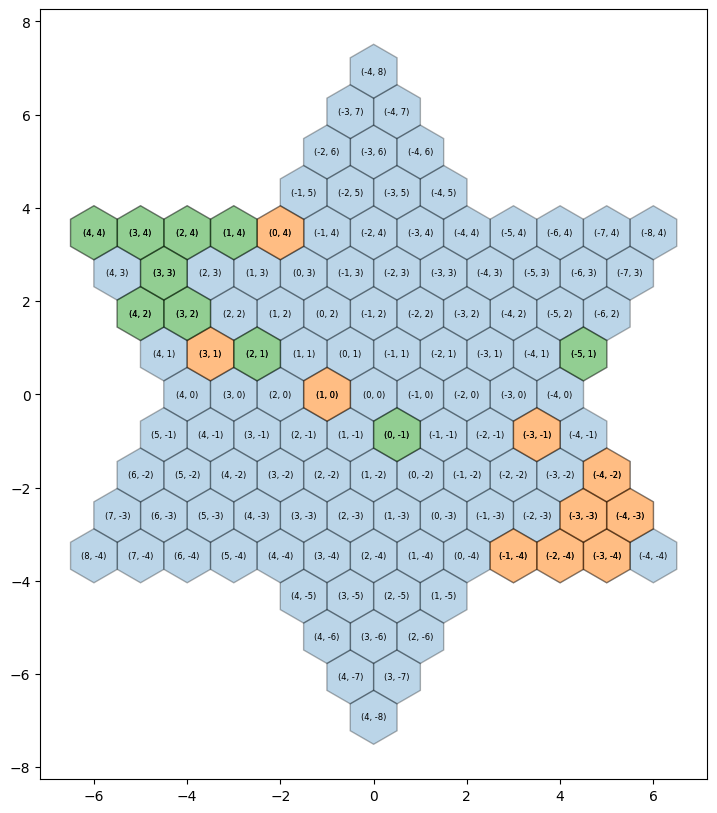

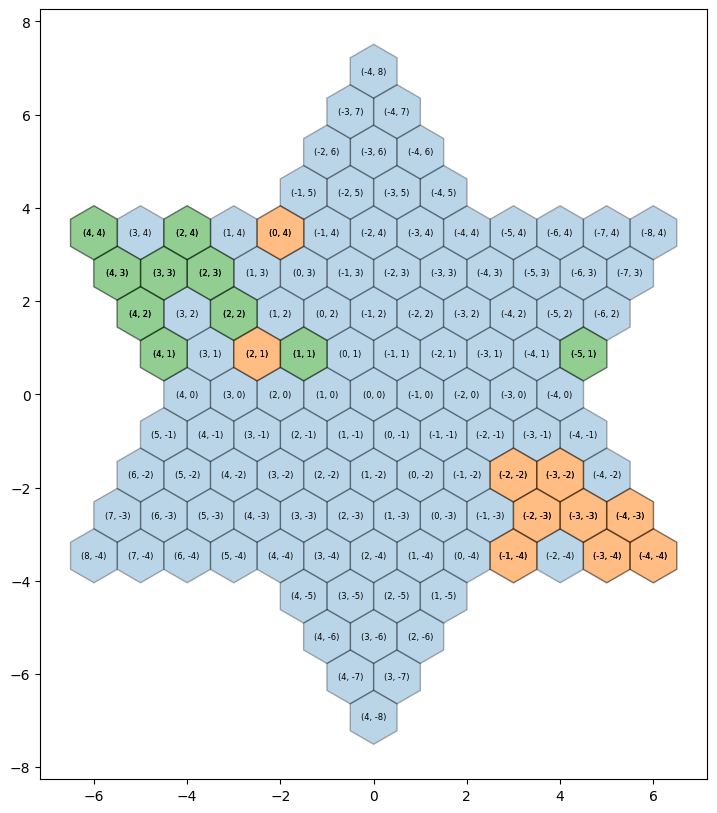

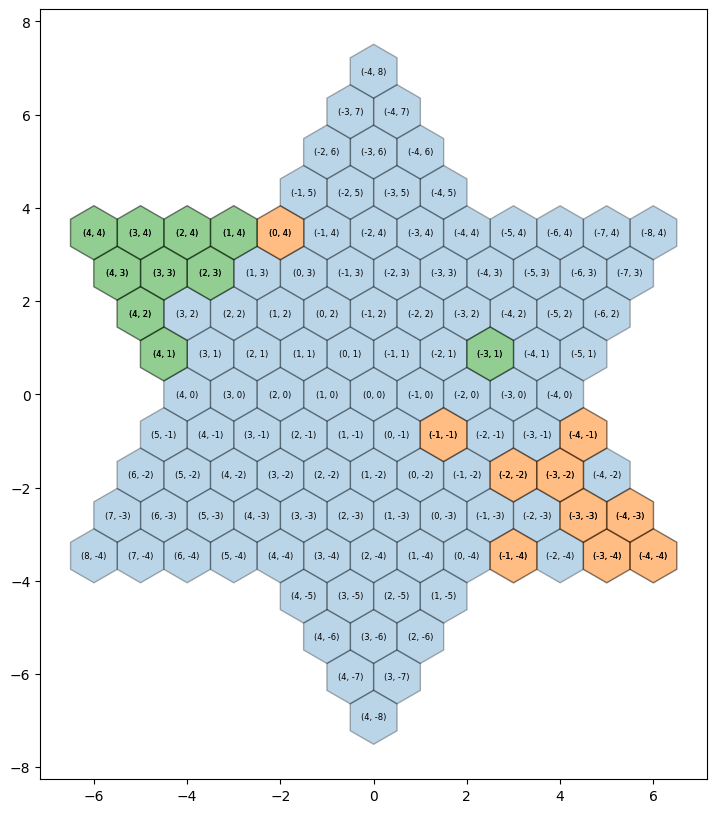

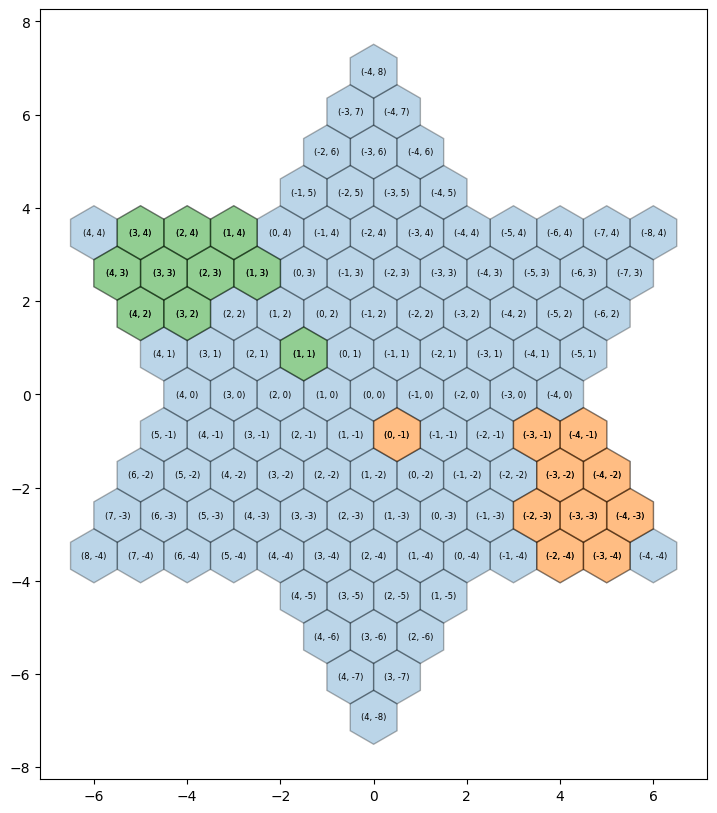

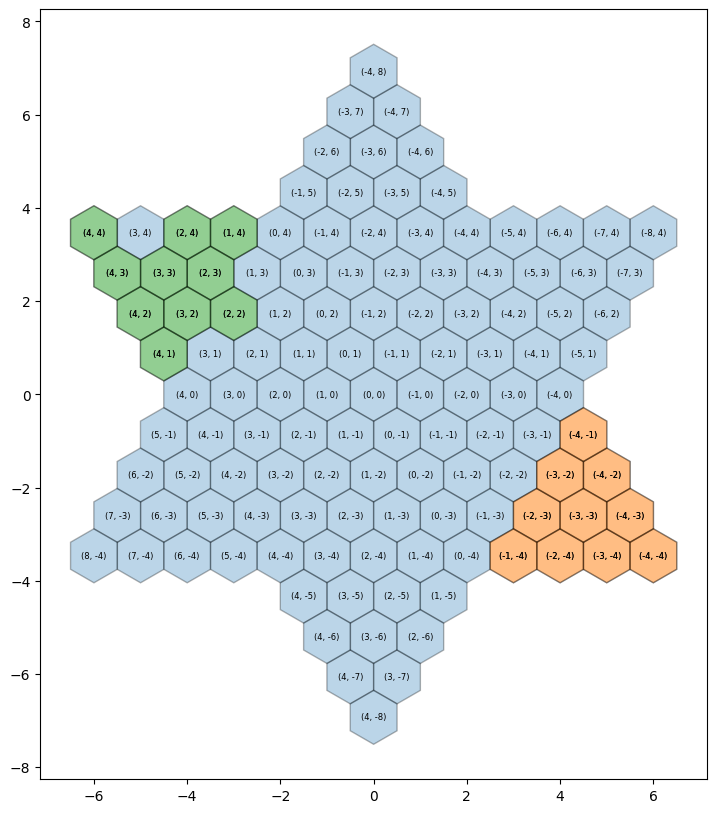

In [6]:
model_1 = BootstrapModel()
model_2 = BootstrapModel()
game_simulation = GameSimulation([model_1, model_2], print_period=40, show_coordinates=True)
winner = game_simulation.simulate_game()
game_simulation.game.print()
print(f"Game Winner: {winner}")

---
### Generate a Training Data from the Bootstrap Model

In [7]:
catalog = GameSimulationCatalog("D:\chinese_checkers_games")

In [8]:
model_1 = BootstrapModel()
model_2 = BootstrapModel()
for game_number in range(10):
    game_simulation = GameSimulation([model_1, model_2])
    try:
        winner = game_simulation.simulate_game()
        print(f"Game Number {game_number}, Winner {winner.player_id}")
        catalog.save_simulation(game_simulation.export_simulation_data("bootstrap_model", "1.0"))
    except:
        print(f"Game Number {game_number}, Not Completed")

Game Number 0, Winner 3
Game Number 1, Winner 0
Game Number 2, Winner 0
Game Number 3, Winner 3
Game Number 4, Not Completed
Game Number 5, Not Completed
Game Number 6, Winner 0
Game Number 7, Winner 3
Game Number 8, Winner 3
Game Number 9, Winner 3


In [9]:
metadata_list = catalog.list_available_metadata()
for metadata in metadata_list:
    simulations = [s for s in catalog.load_simulations_by_metadata(metadata)]
    print(f"Metadata {metadata}, Simulation Count {len(simulations)}")

Metadata GameMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='0', name='bootstrap_model', version='1.0'), Simulation Count 41908
Metadata GameMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='0', name='bootstrap_model', version='1.1'), Simulation Count 12
Metadata GameMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='3', name='bootstrap_model', version='1.0'), Simulation Count 41598
Metadata GameMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='3', name='bootstrap_model', version='1.1'), Simulation Count 12
